<a href="https://colab.research.google.com/github/JeanMusenga/PhD-Thesis_2024_Musenga/blob/main/Classifiers_with_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is the difference between Word2Vec and TF-IDF vectorizer?
Word2Vec vs. BoW and TF-IDF: Word2Vec is a neural network-based technique that learns continuous word embeddings, capturing the semantic relationships between words

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
import gensim
from spacy.tokenizer import Tokenizer
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42) #The random seed helps in the reproduction of the results

In [3]:
dataset=pd.read_excel('posts.xlsx')

In [4]:
dataset.shape

(14932, 2)

In [5]:
dataset.head()

,Question_body,Label
0,Here's the architecture:\n<ol>\n<li>Input comp...,1
1,I am confused about the architecture of Razor ...,1
2,I have some spring boot microservices and I wa...,1
3,I'm trying to properly design an application a...,1
4,I heard that for .NET8 Microsoft gifted us wit...,1


# Tokenization

In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)
print("-----------------------------------------------")

import string
punctuations = string.punctuation
print(punctuations)

{'beforehand', 'in', 'their', 'empty', 'often', 'please', 'used', 'yours', 'our', 'all', 'moreover', 'am', 'throughout', 'with', "'s", 'keep', '‘ll', 'side', 'those', 'n’t', 'herein', 'across', 'name', 'enough', "n't", 'whose', 'everything', 'always', 'they', 'via', 'now', 'whereby', 'she', '‘re', 'whither', 'although', 'amongst', 'why', 'did', 'have', 'thence', 'others', 'eight', 'there', '‘d', 'him', 'else', 'for', 'onto', 'off', 'on', 'into', 'both', 'four', 'really', 'few', 'seemed', 'serious', 'whence', 'mine', 'neither', 'seem', 'thus', 'therefore', 'you', 'just', 'two', 'or', 'hundred', 'latter', 'his', 'ten', '’m', "'d", 'were', 'but', 'me', 'various', 'bottom', 'even', 'above', 'something', 'of', 'ever', 'at', 'take', 'would', '’d', 'anything', 'meanwhile', 'fifty', "'m", 'hence', 'towards', 'while', 'since', 'myself', 'back', 'eleven', 'can', 'anyone', 'had', 'about', 'noone', 'its', 'whenever', 'much', 'yourself', 'them', 'twelve', 'otherwise', 'ca', 'my', 'unless', 'done', 

In [7]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
    #print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [8]:
dataset['Tokens'] = dataset['Question_body'].apply(spacy_tokenizer)

In [9]:
# Save the updated DataFrame to an Excel file
dataset.to_excel('posts.xlsx', index=False)

In [10]:
dataset.head()

,Question_body,Label,Tokens
0,Here's the architecture:\n<ol>\n<li>Input comp...,1,"[architecture, ol, li, input, component, recei..."
1,I am confused about the architecture of Razor ...,1,"[confused, architecture, razor, pages, asp.net..."
2,I have some spring boot microservices and I wa...,1,"[spring, boot, microservice, want, use, micros..."
3,I'm trying to properly design an application a...,1,"[try, properly, design, application, accord, c..."
4,I heard that for .NET8 Microsoft gifted us wit...,1,"[hear, .net8, microsoft, gift, totally, quot;f..."


In [11]:
x = dataset['Tokens'].map(' '.join)
y = dataset['Label']

In [12]:
#dataset.head()

# Split dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=125)

# Features Engineering with TF-IDF

In [14]:
# I consider words that appear more than once, so I set the parameter min_df=2
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vector = TfidfVectorizer(min_df=2).fit(X_train)
X_train_vect_tf_idf = tf_idf_vector.transform(X_train).toarray()
X_test_vect_tf_idf = tf_idf_vector.transform(X_test).toarray()

# Naive Bayes -- TFIDF

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train_vect_tf_idf, y_train)

In [17]:
# Predict on the test set
y_pred = nb_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.6875706214689266
Class 0 - Precision: 0.8331053351573188, Recall: 0.7976424361493124, F1-score: 0.8149882903981265, Support: 1527
Class 1 - Precision: 0.7973770491803279, Recall: 0.8328767123287671, F1-score: 0.8147403685092127, Support: 1460


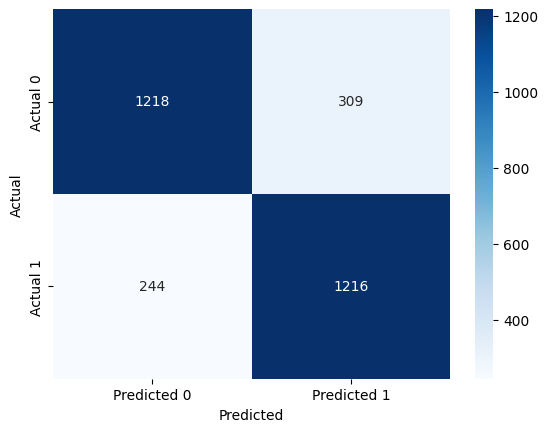

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# kNN with TF-IDF

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_vect_tf_idf, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# Predict on the test set
y_pred = knn_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.7231035477357947
Class 0 - Precision: 0.8302839116719243, Recall: 0.8618205631958088, F1-score: 0.845758354755784, Support: 1527
Class 1 - Precision: 0.8495007132667618, Recall: 0.8157534246575342, F1-score: 0.8322851153039833, Support: 1460


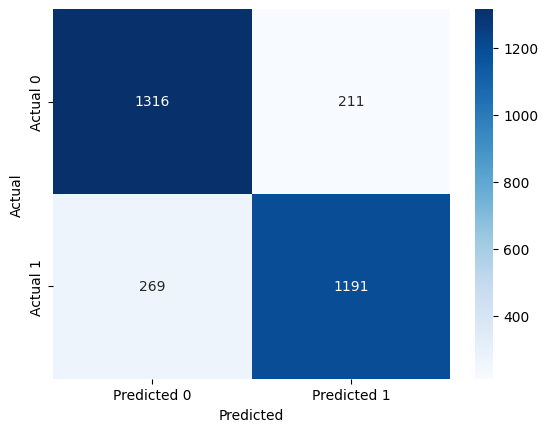

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decison Tree with TF-IDF

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train_vect_tf_idf, y_train)

In [24]:
# Predict on the test set
y_pred = dt_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.8863277549731607
Class 0 - Precision: 0.9463220675944334, Recall: 0.9351669941060904, F1-score: 0.9407114624505928, Support: 1527
Class 1 - Precision: 0.9330175913396481, Recall: 0.9445205479452055, F1-score: 0.9387338325391422, Support: 1460


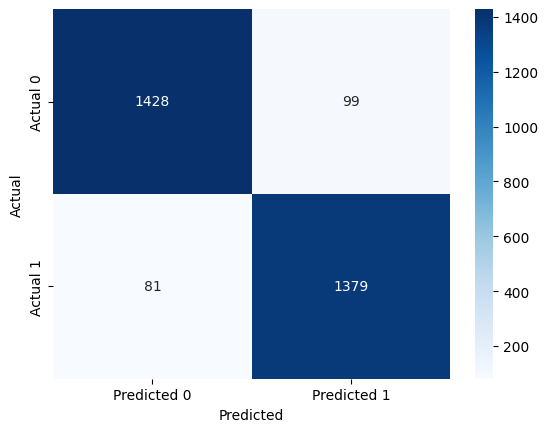

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression with TF-IDF

In [26]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model = lg_model.fit(X_train_vect_tf_idf, y_train)

In [27]:
# Predict on the test set
y_pred = lg_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.9202828672452588
Class 0 - Precision: 0.9768864717878993, Recall: 0.9410609037328095, F1-score: 0.9586390927284857, Support: 1527
Class 1 - Precision: 0.9406332453825857, Recall: 0.9767123287671233, F1-score: 0.9583333333333333, Support: 1460


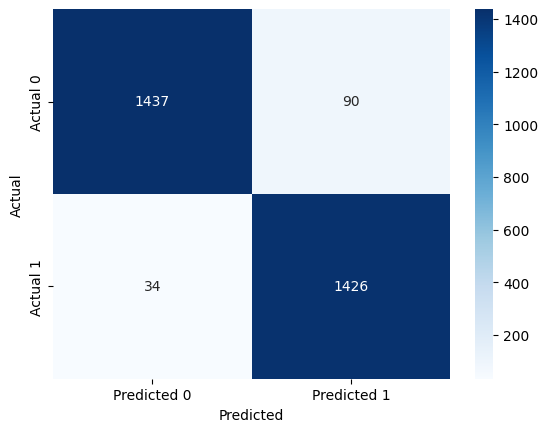

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM with TF-IDF

In [29]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train_vect_tf_idf, y_train)

In [30]:
# Predict on the test set
y_pred = svm_model.predict(X_test_vect_tf_idf)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute metrics for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.9184328837508028
Class 0 - Precision: 0.9888268156424581, Recall: 0.9273084479371316, F1-score: 0.9570800946265631, Support: 1527
Class 1 - Precision: 0.9286173633440514, Recall: 0.989041095890411, F1-score: 0.95787728026534, Support: 1460


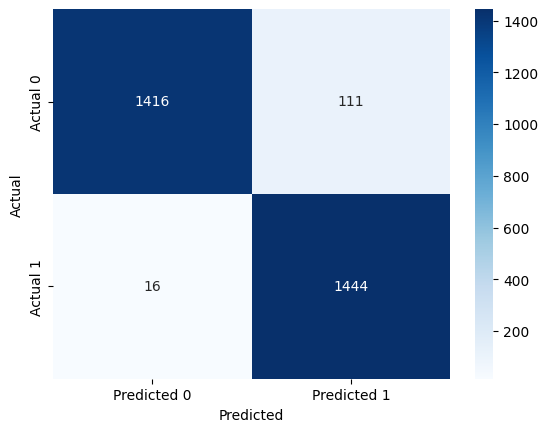

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# GridSearchCV

https://chatgpt.com/share/2d177bbf-aa11-4e78-a40b-04e4504d2933 this is a link with a working example

https://chatgpt.com/share/4200614f-4ded-4cff-8d85-f3d721492adb : this is a link for me to learn about GridSearchCV

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set up the SVM model with GridSearchCV
svm = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
clf = GridSearchCV(svm, parameters, cv=5, scoring='accuracy')

# Train the model
clf.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = clf.best_params_
print("Best Parameters:", best_params)


# Printing Overall Mertics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='1', average='binary')
recall = recall_score(y_test, y_pred, pos_label='1', average='binary')
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", report)

ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'work code discord bot allow toggle passive mode enable add user d list passive mode user remove disable run command happen text file overwrite know wrong pre class="lang py prettyprint-override"><code>@client.command async def passive(ctx value bool ): user_id str(ctx.author.id value open(\'passive.txt w user_id a.read ): await ctx.channel.send(\'you passive mode a.write(f\'{user_id}\\n await ctx.channel.send(\'passive mode successfully enable a.close open(\'passive.txt r r line r.readline r.close open(\'passive.txt w d line line line.strip(\'\\n user_id ): d.write(line await ctx.channel.send(\'no passive mode await ctx.channel.send(\'you passive mode d.close /code></pre'

--------------------------------------------------------------------------------
128 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 953, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'blockquote theoretically impossible inject bean abstract class spring 3 java ee 5 /blockquote dependency injection happen object class spring inject dependency manage bean object instantiate spring abstract class instantiate conceptually wrong think di somewhat relate note define non abstract class abstract spring bean add attribute code abstract true</code code>&lt;bean&gt;</code tag indicate bean instantiate serve mere template property bean use bean inheritance relate java inheritance context configure dependency injection happen child bean parent bean define abstract note mandatory parent bean abstract sense act set common bean property'
